<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to Statistics with `numpy` (Solutions)

_Author: Justin Pounders (ATL) based in part on materials from Kiefer Katovich (SF) and Dave Yerrington (SF)_

---

---

### Notebook Guide

- [1. Measures of Central Tendency](#central_tendency)
    - [1.1 Mean](#mean)
    - [1.2 Media](#median)
    - [1.3 Mode](#mode)
    - [1.4 Skewness](#skewness)
- [2. Measures of Dispersion](#dispersion)
    - [2.1 Range](#range)
    - [2.2 Variance](#variance)
    - [2.3 Stadnard Deviation](#std)
- [Independent Practice](#independent_practice)
- [3. Covariance and Correlation](#covcar)
    - [3.1 Covariance](#covariance)
    - [3.2 Correlation](#correlation)

<a id='central_tendency'></a>
# 1. Measures of Central Tendency


<a id='mean'></a>
## 1.1 Mean

The mean is the sum of the numbers in a list, divided by the length of that list.

**Check:** Find the mean of this list using Python:

In [1]:
samples = [1,2,3,4,5,6,7,8,9,5.3,55.22]

# option 1
mean = sum(samples)/len(samples)
print(mean)

# option 2
import numpy as np

mean = np.mean(samples)
print(mean)

9.592727272727272
9.59272727273


<a id='median'></a>
## 1.2 Median

For odd-length vectors: The median is the middle number of the ordered list.

For even-length vectors: The median is the average of the two middle-most numbers of the ordered list.

We will be reviewing and coding the following cases for calculating the median of a distribution of numbers:

#### Calculate the Median

Here are two samples we will work with.  One set has an odd number of samples, while the other is even.  From  here, we will work with these basic objects.

In [2]:
n_odd = [1,5,9,2,8,3,10,15,7]
n_even = [8,2,3,1,0,-1,-5,20]

#### Median step 1:  Order the numbers

First we must sort our list objects in ascending order, making sure to reassign/update our list objects with the new ascending order.

In [3]:
n_odd = sorted(n_odd)
n_even = sorted(n_even)
print(n_odd)
print(n_even)

[1, 2, 3, 5, 7, 8, 9, 10, 15]
[-5, -1, 0, 1, 2, 3, 8, 20]


#### Median for odd-length vectors: Find the middle number

Find the middle number in a given list sequence for our object, `n_odd`.  

To find the median for an odd sequence of numbers, perform the following operations:

1. Divide the length of our list in half. 
- Subtract .5 from the divided length.
- Select the offset of the `n_odd` list based on the halfed length - .5.

In [4]:
# Try it out.  Find the median 
def median_odd(lst):
    lst_sorted = sorted(lst)
    middle = int(len(lst_sorted)/2 + 0.5)
    median = lst_sorted[middle - 1]
    return median

In [5]:
print(sorted(n_odd))
print(median_odd(n_odd))
print(np.median(n_odd))

[1, 2, 3, 5, 7, 8, 9, 10, 15]
7
7.0


#### Median for even-length vectors: Average the center elements
    
1. Divide the length of our list in half.
- Average the `sample_length - 1` item of the even list (`n_even`) with the `sample_length` item of that list.

In [6]:
# Seek the median using Python!  
def median_even(list):
    middle_lo = int(len(list)/2)
    middle_hi = middle_lo + 1
    median = (list[middle_lo - 1] + list[middle_hi - 1])/2
    return median

In [7]:
print(sorted(n_even))
print(median_even(n_even))
print(np.median(n_even))

[-5, -1, 0, 1, 2, 3, 8, 20]
1.5
1.5


<a id='mode'></a>
## 1.3 Mode

**The mode is the most frequently occurring number.**

Finding the mode is not as straightforward as the mean or median, so let's walk through how to calculate it using `scipy.stats.mode()`. With a partner, take some time to review the docs on `scipy.stats.mode()`, and implement the solution to find the mode of the assigned variable sample below. For this activity, Google is a good place to start.

_Notice the output of the initial state of the code cell below. This is the output of the correct solution. However, it will disappear after you run the cell for the first time._

In [8]:
from scipy import stats
sample = [0,1,1,2,2,2,2,3,3,4,4,4,5]

print(stats.mode(sample))
print(stats.mode(sample)[0])

ModeResult(mode=array([2]), count=array([4]))
[2]


#### Once again, with `scipy`

Thankfully, we have a library that is easy to use and computationally optimized in `scipy` that can help us do the heavy lifting.  When possible it's best to use functions in `scipy` and `numpy`, since they are robust and fast. 

Using `scipy` and `numpy`, find the mean, median, and mode of the distribution `sample` below.

In [9]:
# Import Python modules here
from scipy import stats
import numpy as np


sample = [3, 75, 98, 2, 10, 3, 14, 99, 44, 25, 31, 100, 356, 4, 23, 55, 327, 64, 6, 20]
sample = sorted(sample)
mode = stats.mode(sample)
mean = np.mean(sample)
median = np.median(sample)
 

# print sample
print("mode, mount count: ", mode.mode, mode.count)
print("mean / median:", mean, median)

# Your solution here
# Mean: 67.95, Median: 28.0, Mode: 3.000000, Mode Count: 2

mode, mount count:  [3] [2]
mean / median: 67.95 28.0


<a id='skewness'></a>
## 1.4 Skewness and the mean/median/mode

Skewness refers to the lack of symmetry in a distribution of data.

[Technical note: we will be talking about skewness here only in the context of _unimodal_ distributions.]

![](../assets/images/skewness.png)

A *positive-skewed* distribution is one whose right tail is longer or fatter than its left. 

Conversely, a *negative-skewed* distribution is one whose left tail is longer or fatter than its right.


Symmetric distributions have no skewness!


Does the list of numbers below form a symmetric distribution? Is it skewed left of right?

In [10]:
# This is our sample
sample = [3, 75, 98, 2, 10, 3, 14, 99, 44, 25, 31, 100, 356, 4, 23, 10, 55, 327, 64, 6, 20]

def skewness(lis):
    if np.mean(lis) > np.median(lis):
        print("The data is skewed right")
    elif np.mean(lis) < np.median(lis):
        print("The data is skewed left")
    else:
        print("The data is normally distributed")
    
skewness(sample)


The data is skewed right


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1137e55c0>]], dtype=object)

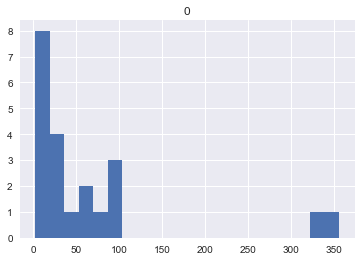

In [11]:
# We can code a quick example to plot this distribution
import pandas as pd
import seaborn as sns

df = pd.DataFrame(sample)

%matplotlib inline

df.hist(bins=len(sample))

<a id='dispersion'></a>
# 2. Measures of Dispersion

---

Measures of dispersion including the **range**, **variance**, and **standard deviation** tell you about the spread of your data.

These measurements give complementary information to the measures of central tendency and are no less important.


<a id='range'></a>
## 2.1 Range

The range is the space between the lowest and highest values of a distribution. Because this metric only depends on two observations, it's a simple calculation. Range shows how widely the numbers in a set vary.

To calculate the range:

1. Sort the `sample` object in ascending order.
- Subtract the first item from the last item.
- Compare your result with `numpy`'s `ptp()` method, which accomplishes the same task.


In [12]:
sample = [3, 75, 98, 2, 10, 3, 14, 99, 44, 25, 31, 100, 356, 4, 23, 55, 327, 64, 6, 20]

# With numpy:
n_range = np.ptp(sample)
print(n_range)


# Now implement this in pure Python
print(max(sample) - min(sample))

354
354


<a id='variance'></a>
## 2.2 Variance

The variance is a numeric value used to describe the degree of spread in a distribution of the numbers.

In Python, (population) variance can be calculated with:
```python
variance = []
n_mean = np.mean(n)

for n_ in n:
  variance.append((n_ - n_mean) ** 2)

variance = np.sum(variance)
variance = variance / len(n)
```

Which is the average of the sum of the squared distances of each number from the mean of the numbers.

Using `numpy` the variance is simply:
```python
variance = np.var(n)

print(variance)
9414.6475
```

![](assets/images/dist_with_variance.png)


---

**Turn and Talk**:

With a neighbor, take 3 minutes to discuss the following questions.  I will call on campuses to share a response with all of us.

- What could a distribution with a large variance look like? A small?
- What does a variance of 0 mean?

---

Calculate the population and sample variances of the `sample` list.  

(**Check**: what if I forget what the argument for the divisor is??)

In [13]:
pop_var = np.var(sample)
samp_var = np.var(sample, ddof=1)

print(pop_var)
print(samp_var)

9414.6475
9910.15526316


<a id='std'></a>
## 2.3 Standard deviation

The standard deviation is the square root of the variance.

Because the variance is the average of the distances from the mean _squared_, the standard deviation tells us approximately, on average, the distance of numbers in a distribution from the mean of the distribution.

The standard deviation can be calculated like so:
```python
std = np.std(n)

print(std)
97.029106457804716
```

![](../assets/images/dist_with_var_std.png)


Calculate the standard deviation of the `sample` list.  Is this the population or sample standard deviation?

In [14]:
pop_std = np.std(sample)
samp_std = np.std(sample, ddof=1)

print(pop_std)
print(samp_std)

97.0291064578
99.5497627479


<a id='independent_practice'></a>

# Independent Practice

---

Open up the notebook for [independent practice on the measures of central tendency](../measures-of-central-tendency-practice.ipynb). This is review of this lecture as well as extra practice programming in Python.


<a id='covcor'></a>
# 3. Covariance and Correlation

<a id='covariance'></a>
## 3.1 Covariance


Covariance is a generalization of correlation that measures how two variables change together. However, it is not adjusted for individual variances like correlation. 

Covariances can take on any value, which means that interpreting covariance by itself is difficult to do. It makes more sense to compare two correlations than to compare two covariances.

If you want to calculate the covariance between two variables in Python, use the following code:
```python
import numpy as np
np.cov(var1,var2)
```

In [15]:
x = [1,2,5,2,3,7,1,2,6,8,3,4,2]
y = [0,6,2,3,7,1,3,4,21,3,7,4,5]

np.cov(x,y)

array([[  5.26923077,   2.53846154],
       [  2.53846154,  27.41025641]])

<a id='correlation'></a>
## 3.2 (Pearson's) Correlation Coefficient

If you want to calculate the correlation between two variables with numpy, use the following code:
```python
import numpy as np
np.corrcoef(var1,var2)
```

In [16]:
x = [1,2,5,2,3,7,1,2,6,8,3,4,2]
y = [0,6,2,3,7,1,3,4,21,3,7,4,5]

np.corrcoef(x, y)

array([[ 1.        ,  0.21122262],
       [ 0.21122262,  1.        ]])